# Driven, Damped Pendulum Coding Lab
#### Tarushii Goel, Grace Huang, Rolina Qi

In [ ]:
# Import the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

#the next line makes graphs look better on HD monitors, you can delete it if you want
%config InlineBackend.figure_format='retina'     

#this is the library function we are going to use to numericaly solve the ODE
from scipy.integrate import odeint

In [ ]:
def PendODE(S, time, A):
    g = 1
    m = 1
    R = 1
    b = 0.5
    
    k = 0.6667
    alpha = -1*g*np.sin(S[0])/R + (-1*b*S[1]+A*np.cos(k*time))/(m*R*R)
    omega = S[1]
    return [omega, alpha]

In [ ]:
#this method takes the output from ODEint (SOL), and the list of 
#times that ODEint was evaluated at (t), and returns a dataframe
#that contains theta (with periodic boundary conditions), omega, 
#and time

def constructDataFrame(SOL,t):
    df = pd.DataFrame(-SOL, columns = ["theta","omega"])
    df["time"]= t
    df["Ptheta"]=np.remainder(df["theta"]+np.pi,2*np.pi)-np.pi
    return df

def RunModel(A):
    #define initial theta and angular velocity of the mass

    InitState=[0, 0]

    #define all the discrete-time steps we are going to take for the simulation
    #and store them in a list "t".  np.linspace(first time, last time, how many 
    #steps we take between first and last)

    t=np.linspace(0,1000,20000)
    #run the solver
    SOL = odeint(PendODE, InitState, t, args=(A,))
    df = constructDataFrame(SOL, t)

    #make plots
    df.plot(x='time',y='Ptheta',kind='scatter', title='Ptheta [rad] vs. Time [s]', s=0.1, xlim=(930, 1000), ylim=(-3.5, 3.5));
    df.plot(x='time',y='omega',kind='line', title='Angular Velocity [rad/s] vs. Time [s]', xlim=(930, 1000));
    #phase plot
    ax = df.plot(x='Ptheta',y='omega',kind='scatter', title='Phase Plot', s=0.1, xlim=(-3.5, 3.5));
    ax.set_xlabel('Theta [rad]')
    ax.set_ylabel('Angular Velocity [rad/s]');
    #print(df.tail()['theta'])



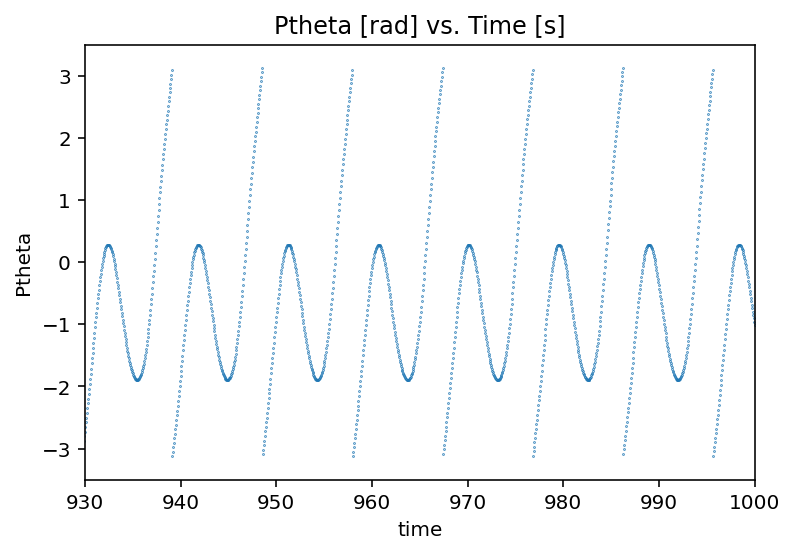

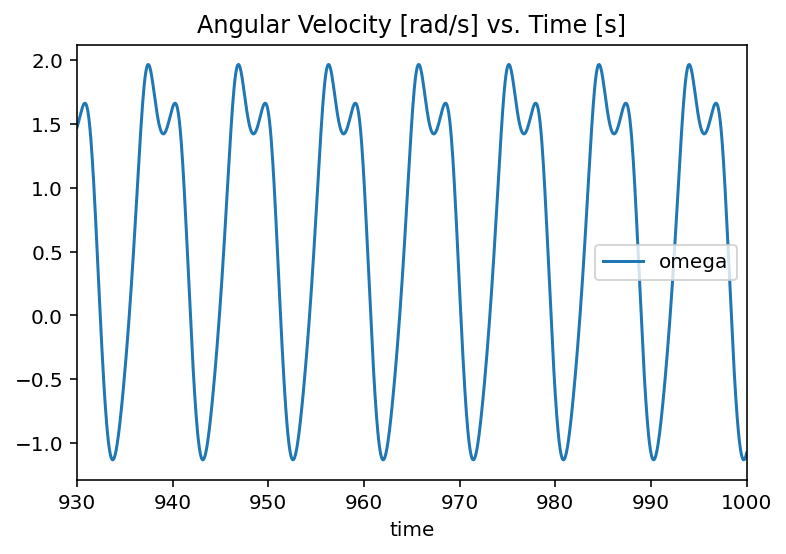

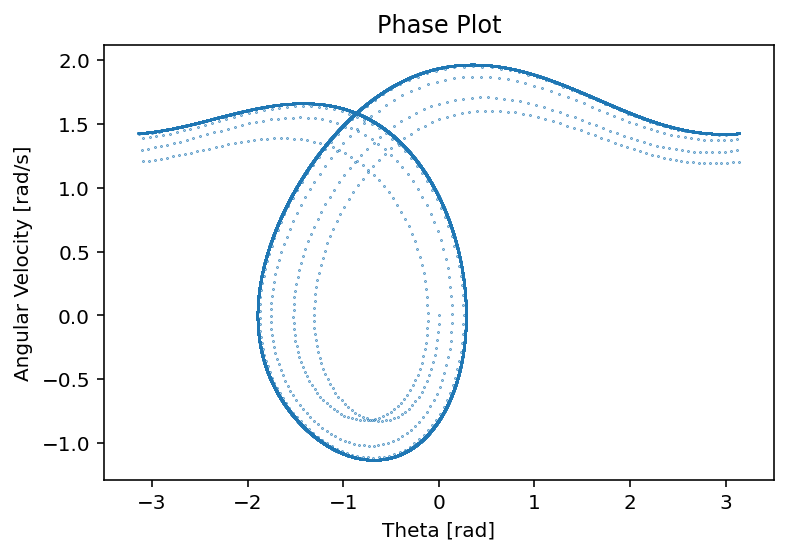

In [ ]:
RunModel(1.35)

# Questions for Level 1

Using the values of A in the table below, consider the three graphs you generated as the output of RunModel and explore the full behavior of this system. Describe what the system is doing for each value of A and the evidence that leads you to that conclusion. 

Values of A

1.35

The phase plot of the system is approaching a loop, as the phase plot is showing a solid, dark line forming a single loop.

1.45

The phase plot of the system is approaching a double loop, as the phase plot is showing two solid lines, one forming a loop within the loop formed by the other.

1.47

The phase plot of the system is approaching a quadruple loop, as the phase plot is showing four solid lines forming four loops, one within the next. The outmost loop is actually very close to the second outmost loop, but they are separate.

1.5

The phase plot of this system is not forming any clear pattern or shape, as the phase plot is basically a chaos of no identifiable pattern.


Present a hypothesis that may explain why adjusting the driving amplitude (only) produces so many different types of behavior for the system. 

Our answer to this question revolves around two concepts, resonance and period doubling (or bifurcation). 

To talk about resonance, we should first talk about natural frequency, which is the frequency at which a system would oscillate even without a driving or damping force. Then, we can define resonance as the phenomenon where large amplitude oscillations in a system is produced by a small amplitude driving force, which has a frequency equal to the natural frequency. In simpler terms and in terms of this lab, resonance refers to the large change in system behavior when we modify A slightly due to the fact that this driving force is applied at a "smart" frequency close to the natural frequency of the pendulum.

Another important topic to help form our hypothesis is period doubling or bifurcation. In our experiment, period doubling refers to when we increment the driving amplitude by small amounts, which causes the number of loops in the final repeating pattern to double, thus changing its behavior. This incremental change results in many different behaviors from what is ultimately a small change in A. As a result of these small changes, the system enters into chaos with no simple repeating pattern and unpredictable behavior. 


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aed4e85d-eb21-46a0-b666-b89da5485457' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>